In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = 'data/train'
valid_dir = 'data/valid'
test_dir = 'data/test'


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 2076 images belonging to 2 classes.
Found 531 images belonging to 2 classes.
Found 231 images belonging to 2 classes.


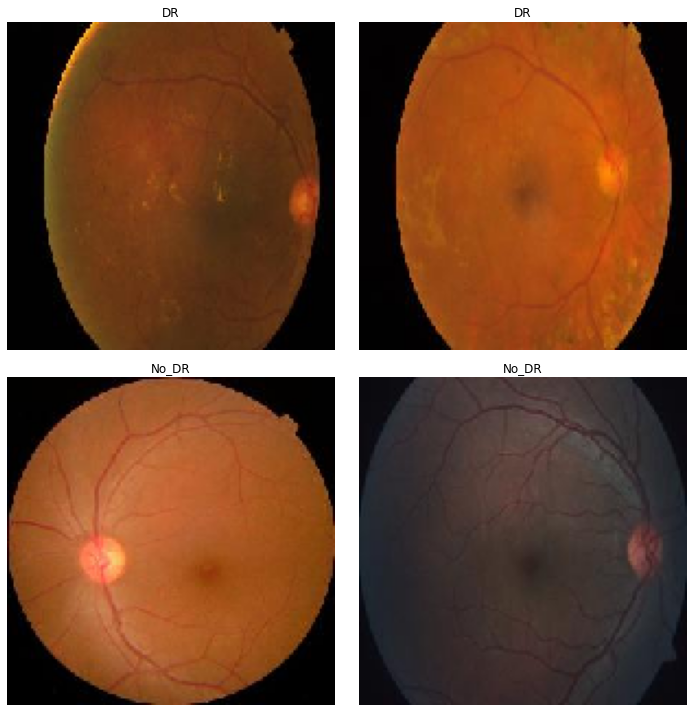

In [3]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image


dr_path = 'data/train/DR'
no_dr_path = 'data/train/No_DR'

dr_images = [os.path.join(dr_path, fname) for fname in os.listdir(dr_path)[:2]]
no_dr_images = [os.path.join(no_dr_path, fname) for fname in os.listdir(no_dr_path)[:2]]

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    return img_array

dr_imgs = [load_and_preprocess_image(img_path) for img_path in dr_images]
no_dr_imgs = [load_and_preprocess_image(img_path) for img_path in no_dr_images]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()

for i in range(2):
    axes[i].imshow(dr_imgs[i])
    axes[i].set_title("DR")
    axes[i].axis('off')

for i in range(2):
    axes[i + 2].imshow(no_dr_imgs[i])
    axes[i + 2].set_title("No_DR")
    axes[i + 2].axis('off')

plt.tight_layout()
plt.show()


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [3]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size
)


Epoch 1/30
64/64 [==============================] - 91s 1s/step - loss: 0.6005 - accuracy: 0.6962 - val_loss: 0.2795 - val_accuracy: 0.8926
Epoch 2/30
64/64 [==============================] - 56s 865ms/step - loss: 0.3692 - accuracy: 0.8488 - val_loss: 0.2608 - val_accuracy: 0.9102
Epoch 3/30
64/64 [==============================] - 49s 764ms/step - loss: 0.2859 - accuracy: 0.8860 - val_loss: 0.2461 - val_accuracy: 0.9180
Epoch 4/30
64/64 [==============================] - 51s 796ms/step - loss: 0.2834 - accuracy: 0.8924 - val_loss: 0.2617 - val_accuracy: 0.9082
Epoch 5/30
64/64 [==============================] - 49s 766ms/step - loss: 0.2574 - accuracy: 0.9046 - val_loss: 0.2331 - val_accuracy: 0.9180
Epoch 6/30
64/64 [==============================] - 49s 764ms/step - loss: 0.2557 - accuracy: 0.9007 - val_loss: 0.2408 - val_accuracy: 0.9043
Epoch 7/30
64/64 [==============================] - 49s 767ms/step - loss: 0.2615 - accuracy: 0.8987 - val_loss: 0.2611 - val_accuracy: 0.9199
Ep

In [4]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_acc:.2f}')


7/7 [==============================] - 4s 636ms/step - loss: 0.1997 - accuracy: 0.9464
Test accuracy: 0.95


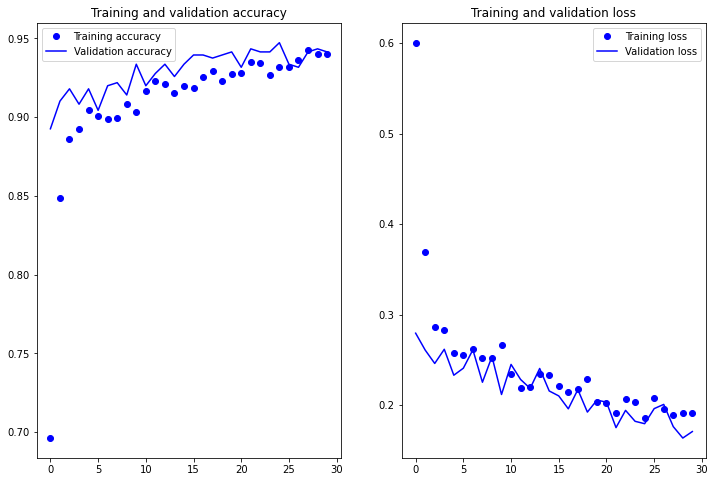

In [5]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [6]:
model.save('diabetic_retinopathy_classifier.h5')
